# Online Payments Fraud Detection

This project goals are:

- Provide an analysis on the data.
- Create a model based on classification to detect fraudulent payments.
- Use hypotetical testing to check for reliable results from models.

Online payment frauds are one of the main risks of e-Commerce, in 2021, $ 20 billions were estimated to be lost by fraudulent transactions according to [Juniper research](https://www.juniperresearch.com/infographics/online-payment-fraud-statistics). Also according to [Juniper](https://www.juniperresearch.com/infographics/online-payment-fraud-statistics), most of the frauds are US based, with a rapid growth of frauds in China. This is due to mainly three points, the pandemic forced stores to move to e-Commerce which have frauds they are not prepared for, data breaches and fraudsters using machine learning to enhance the practice.

According to [Merchant Savvy](https://www.merchantsavvy.co.uk/payment-fraud-statistics/), companies that invest in a fraud detection program have reduced attack response expenses by 42%, reduced by 17% the investment in prevention, also reducing by 16% the amount of fines/penalties payed with such a program. In South America alone, according to [MRC](https://www.ravelin.com/insights/online-payment-fraud), 2.8% of suspected transactions were saved by having proper sistems in place.

The dataset used for this study is available on Kaggle, you can check it [here](https://www.kaggle.com/datasets/ealaxi/paysim1), it is composed by artificial data sourced from the [PaySim](https://github.com/EdgarLopezPhD/PaySim), a mobile money payment simulator.

## Downloading the dataset

First, let's download the dataset into the directory the notebook is running.

The dataset is composed by only one csv file, which can be done easily with the following code.

**WARNING**

Don't forget to generate a API key with your Kaggle account, this process can be done by accessing your profile on the "Account" tab, you will generate a .json file with your account name and key, that should be provided in order to download the dataset through this method.

In [7]:
# Run this cell in case you don't have the required packages
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=b3a128fd0327fa110c5d352a8d38ca645d64feb7e1a0997284dcfb0d139aa1db
  Stored in directory: /home/romulo/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [8]:
import opendatasets as ods

In [9]:
ods.download("https://www.kaggle.com/datasets/ealaxi/paysim1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle Key:Downloading paysim1.zip to ./paysim1


100%|██████████| 178M/178M [00:56<00:00, 3.32MB/s] 


## Exploratory Data Analysis

Now that the dataset is downloaded, let's start understanding the data a litte better.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("paysim1/PS_20174392719_1491204439457_log.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

After this first commands, is possible to conclude that is a large number of observations and that not a single row has a empty value.

Another conclusion is that "nameOrig" and "nameDest" is a mixed type of value, maybe splitting information can give us some useful gain.

But first let's analyze the numerical features.

In [14]:
data_skew = data.skew(axis = 0)
data_kurt = data.kurt(axis = 0)
data_median = data.median()
data.describe().T.assign(skewness = data_skew, kurtosis = data_kurt, median = data_median)

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,median
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02,0.375177,0.329071,239.000
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07,30.993949,1797.956705,74871.940
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07,5.249136,32.964879,14208.000
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07,5.176884,32.066985,0.000
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08,19.921758,948.674125,132705.665
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08,19.352302,862.156508,214661.440
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00,27.779538,769.702982,0.000
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00,630.603629,397659.062500,0.000


Here is possible to see how spread the data is, the "step" feature is a measure of time, it will be transformed later into a something workable, "isFraud" and "isFlaggedFraud" are both categorical, despite that encoded already.

The other features are truelly numerical and have a very unique shape, let's visualize them.

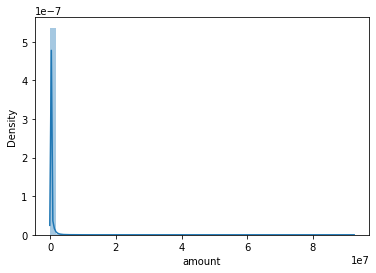

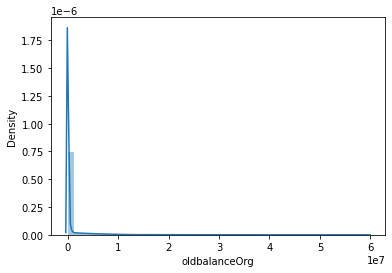

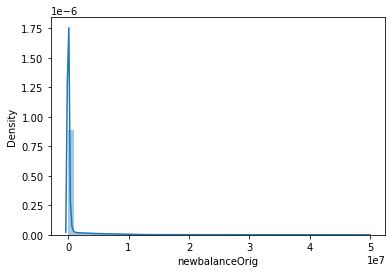

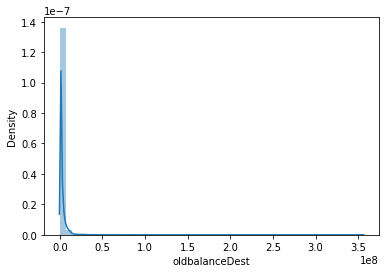

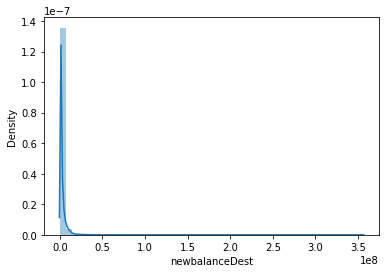

In [18]:
for column in ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]:
    sns.distplot(data[column]);
    plt.show()